## Music Style Detector : data analysis

This little notebook is a quick analysis of the data used to train the model.

### 1. Import libraries and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os

In [6]:
DATA_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir, '../models/genre_detector/data'))
print(DATA_PATH)

c:\Users\benja\Projects\MLodImage\code\models\genre_detector\data


In [7]:
fma_df = pd.read_csv(os.path.join(DATA_PATH, 'raw', 'fma_genres.csv'))
fma_df.head()

,filename,genre_label,genre_id
0,082066.mp3,Classical,1
1,065795.mp3,Classical,1
2,011721.mp3,Classical,1
3,145568.mp3,Classical,1
4,070936.mp3,Classical,1


In [8]:
gtzan_df = pd.read_csv(os.path.join(DATA_PATH, 'raw', 'gtzan_genres.csv'))
gtzan_df.head()

,filename,genre_label,genre_id
0,blues.00000.wav,Blues,0
1,blues.00001.wav,Blues,0
2,blues.00002.wav,Blues,0
3,blues.00003.wav,Blues,0
4,blues.00004.wav,Blues,0


### 2. Data analysis

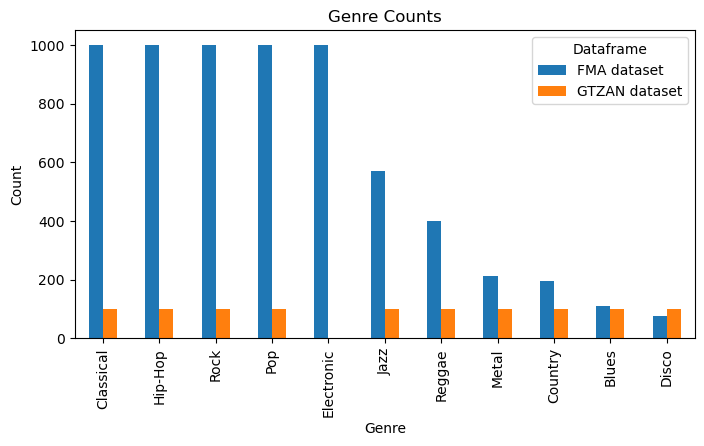

In [9]:
# plot the distribution of genres in both datasets
fma_genre_counts = fma_df.groupby('genre_label').size().reset_index(name='fma_count') # count the number of tracks per genre in the FMA dataset
sorted_genres = fma_genre_counts.sort_values(by='fma_count', ascending=False)['genre_label'].tolist() # sort the genres by the number of tracks in the FMA dataset
gtzan_genre_counts = gtzan_df.groupby('genre_label').size().reset_index(name='gtzan_count') # count the number of tracks per genre in the GTZAN dataset
merged_df = pd.merge(fma_genre_counts, gtzan_genre_counts, on='genre_label', how='outer') # merge the two dataframes
merged_df = merged_df.fillna(0) #  fill the NaN values with 0
merged_df = merged_df.sort_values(by='fma_count', ascending=False) # sort the genres by the number of tracks in the FMA dataset
merged_df['genre_label'] = pd.Categorical(merged_df['genre_label'], categories=sorted_genres) # sort the genres by the number of tracks in the FMA dataset

# plot the the genre counts (grouped bar chart with two bars per genre)
merged_df.plot(kind='bar', x='genre_label', figsize=(8, 4))
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(['FMA dataset', 'GTZAN dataset'], title='Dataframe')
plt.show()